In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer

In [2]:
import pandas as pd
from google.colab import files
data_to_load = files.upload()

Saving flight_data__.csv to flight_data__.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['flight_data__.csv']))

In [4]:
df

,Unnamed: 0,flight_name,flight_id,start_time,end_time,travel_time,stops,fare,source,destination
0,0,Go First,G8 - 336,14:20,16:35,2h 15m,Non Stop,"5,954",DEL-Delhi,BOM-Mumbai
1,1,Go First,G8 - 392,12:45,15:00,2h 15m,Non Stop,"5,954",DEL-Delhi,BOM-Mumbai
2,2,Go First,G8 - 323,18:05,20:25,2h 20m,Non Stop,"5,954",DEL-Delhi,BOM-Mumbai
3,3,Go First,G8 - 717,16:45,21:25,4h 40m,1 stop at Ahmedabad,"5,954",DEL-Delhi,BOM-Mumbai
4,4,Go First,G8 - 167,15:00,21:55,6h 55m,1 stop at Ranchi,"5,954",DEL-Delhi,BOM-Mumbai
...,...,...,...,...,...,...,...,...,...,...
7029,7029,IndiGo,6E - 137,11:55,23:15,11h 20m,"2 Stops (SXR, DEL)","12,092",IXJ-Jammu,CJB-Coimbatore
7030,7030,IndiGo,6E - 124,16:30,23:15,6h 45m,1 stop at Delhi,"14,454",IXJ-Jammu,CJB-Coimbatore
7031,7031,IndiGo,6E - 6738,13:10,23:15,10h 5m,1 stop at Delhi,"14,454",IXJ-Jammu,CJB-Coimbatore
7032,7032,IndiGo,6E - 6152,06:05,17:05,11h,1 stop at Mumbai,"10,782",CJB-Coimbatore,DED-Dehradun


In [5]:
df.shape

(7034, 10)

In [6]:
df.dtypes

Unnamed: 0      int64
flight_name    object
flight_id      object
start_time     object
end_time       object
travel_time    object
stops          object
fare           object
source         object
destination    object
dtype: object

In [7]:
# Removing index column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df

,flight_name,flight_id,start_time,end_time,travel_time,stops,fare,source,destination
0,Go First,G8 - 336,14:20,16:35,2h 15m,Non Stop,"5,954",DEL-Delhi,BOM-Mumbai
1,Go First,G8 - 392,12:45,15:00,2h 15m,Non Stop,"5,954",DEL-Delhi,BOM-Mumbai
2,Go First,G8 - 323,18:05,20:25,2h 20m,Non Stop,"5,954",DEL-Delhi,BOM-Mumbai
3,Go First,G8 - 717,16:45,21:25,4h 40m,1 stop at Ahmedabad,"5,954",DEL-Delhi,BOM-Mumbai
4,Go First,G8 - 167,15:00,21:55,6h 55m,1 stop at Ranchi,"5,954",DEL-Delhi,BOM-Mumbai
...,...,...,...,...,...,...,...,...,...
7029,IndiGo,6E - 137,11:55,23:15,11h 20m,"2 Stops (SXR, DEL)","12,092",IXJ-Jammu,CJB-Coimbatore
7030,IndiGo,6E - 124,16:30,23:15,6h 45m,1 stop at Delhi,"14,454",IXJ-Jammu,CJB-Coimbatore
7031,IndiGo,6E - 6738,13:10,23:15,10h 5m,1 stop at Delhi,"14,454",IXJ-Jammu,CJB-Coimbatore
7032,IndiGo,6E - 6152,06:05,17:05,11h,1 stop at Mumbai,"10,782",CJB-Coimbatore,DED-Dehradun


In [9]:
df.isnull().sum().sum()

777

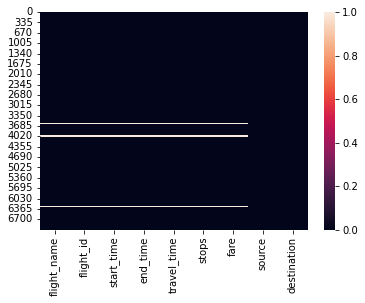

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum().sum()/df.shape[0]

0.1104634631788456

In [12]:
# Drop column with no data
df.dropna(inplace=True)

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.columns

Index(['flight_name', 'flight_id', 'start_time', 'end_time', 'travel_time',
       'stops', 'fare', 'source', 'destination'],
      dtype='object')

In [15]:
df.head()

,flight_name,flight_id,start_time,end_time,travel_time,stops,fare,source,destination
0,Go First,G8 - 336,14:20,16:35,2h 15m,Non Stop,"5,954",DEL-Delhi,BOM-Mumbai
1,Go First,G8 - 392,12:45,15:00,2h 15m,Non Stop,"5,954",DEL-Delhi,BOM-Mumbai
2,Go First,G8 - 323,18:05,20:25,2h 20m,Non Stop,"5,954",DEL-Delhi,BOM-Mumbai
3,Go First,G8 - 717,16:45,21:25,4h 40m,1 stop at Ahmedabad,"5,954",DEL-Delhi,BOM-Mumbai
4,Go First,G8 - 167,15:00,21:55,6h 55m,1 stop at Ranchi,"5,954",DEL-Delhi,BOM-Mumbai


In [16]:
df.shape

(6923, 9)

In [17]:
# Changin config
pd.options.display.max_rows = 1000

In [18]:
df['flight_name'].value_counts()

Air India    3084
IndiGo       1746
Vistara      1401
Go First      378
SpiceJet      261
Air Asia       53
Name: flight_name, dtype: int64

In [19]:
df['flight_id'].value_counts()

AI - 516     86
AI - 838     77
AI - 424     71
AI - 505     66
AI - 573     65
AI - 543     64
AI - 607     62
AI - 501     62
AI - 809     59
UK - 878     56
AI - 640     56
AI - 687     56
AI - 660     55
AI - 806     55
AI - 867     54
AI - 430     54
AI - 559     54
AI - 635     53
UK - 852     53
AI - 442     53
AI - 888     51
AI - 808     49
AI - 9894    48
AI - 541     48
UK - 706     47
AI - 804     47
UK - 657     46
AI - 639     43
AI - 440     43
AI - 503     41
UK - 986     41
AI - 840     40
UK - 877     39
UK - 854     39
UK - 772     37
UK - 776     36
AI - 515     36
UK - 996     36
UK - 958     35
UK - 944     35
AI - 402     35
AI - 770     34
UK - 816     34
AI - 538     33
AI - 619     33
UK - 802     32
UK - 994     32
UK - 812     32
AI - 676     32
AI - 651     30
AI - 637     30
AI - 539     30
AI - 9893    30
UK - 720     30
UK - 863     29
UK - 928     28
AI - 638     28
AI - 698     28
UK - 810     28
UK - 870     28
AI - 9890    28
UK - 890     27
AI - 954

In [20]:
df['stops'].value_counts()

1 stop at Delhi                      1858
1 stop at Mumbai                      670
Non Stop                              557
2 Stops (BOM, DEL)                    321
1 stop at Hyderabad                   258
2 Stops (DEL, BOM)                    255
1 stop at Bengaluru                   224
2 Stops (HYD, DEL)                    186
1 stop at Kolkata                     171
2 Stops (BLR, DEL)                    166
1 stop at Chennai                     109
2 Stops (CCU, DEL)                     61
2 Stops (GOI, DEL)                     51
2 Stops (MAA, DEL)                     50
1 stop at Goa                          46
2 Stops (IXC, DEL)                     46
3 Stops (BBI, STV, DEL)                42
2 Stops (IXU, DEL)                     37
1 stop at Ahmedabad                    36
2 Stops (DEL, BHO)                     35
2 Stops (DEL, SXR)                     35
2 Stops (IDR, DEL)                     33
2 Stops (DEL, MAA)                     33
2 Stops (JAI, DEL)                

In [21]:
df['destination'].value_counts()

IXC-Chandigarh            417
AMD-Ahmedabad             393
MAA-Chennai               373
GOI-Goa                   373
PNQ-Pune                  372
LKO-Lucknow               368
COK-Kochi                 297
VNS-Varanasi              296
CU-Kolkata                295
IDR-Indore                290
JAI-Jaipur                276
BBI-Bhubaneshwar          266
GAU-Guwahati              259
RPR-Raipur                253
CJB-Coimbatore            241
VTZ-Vishakhapatnam        241
HYD-Hyderabad             223
ATQ-Amritsar              221
SXR-Srinagar              211
BLR-Bengaluru             190
PAT-Patna                 187
IXR-Ranchi                157
TRV-Thiruvananthapuram    143
IXJ-Jammu                 136
NAG-Nagpur                124
DED-Dehradun               97
IXB-Bagdogra               89
BOM-Mumbai                 83
CCJ-Kozhikode              52
Name: destination, dtype: int64

# Chanign start_time	end_time	travel_time	stops	fare	

In [22]:
# fare
df['fare'] = df['fare'].str.replace(',', '')
df['fare'] = df['fare'].astype('int')

In [23]:
df.head()

,flight_name,flight_id,start_time,end_time,travel_time,stops,fare,source,destination
0,Go First,G8 - 336,14:20,16:35,2h 15m,Non Stop,5954,DEL-Delhi,BOM-Mumbai
1,Go First,G8 - 392,12:45,15:00,2h 15m,Non Stop,5954,DEL-Delhi,BOM-Mumbai
2,Go First,G8 - 323,18:05,20:25,2h 20m,Non Stop,5954,DEL-Delhi,BOM-Mumbai
3,Go First,G8 - 717,16:45,21:25,4h 40m,1 stop at Ahmedabad,5954,DEL-Delhi,BOM-Mumbai
4,Go First,G8 - 167,15:00,21:55,6h 55m,1 stop at Ranchi,5954,DEL-Delhi,BOM-Mumbai


In [24]:
# change stops
df['stops'] = df['stops'].str.lower().apply(lambda X: X.split('stop')[0])
df['stops'] = df['stops'].str.replace('non','0')
df['stops'] = df['stops'].astype('int')

In [25]:
df.head()

,flight_name,flight_id,start_time,end_time,travel_time,stops,fare,source,destination
0,Go First,G8 - 336,14:20,16:35,2h 15m,0,5954,DEL-Delhi,BOM-Mumbai
1,Go First,G8 - 392,12:45,15:00,2h 15m,0,5954,DEL-Delhi,BOM-Mumbai
2,Go First,G8 - 323,18:05,20:25,2h 20m,0,5954,DEL-Delhi,BOM-Mumbai
3,Go First,G8 - 717,16:45,21:25,4h 40m,1,5954,DEL-Delhi,BOM-Mumbai
4,Go First,G8 - 167,15:00,21:55,6h 55m,1,5954,DEL-Delhi,BOM-Mumbai


In [26]:
def change_time(one_time):
    
    hour = 0 
    minute = 0
    
    one_time_change = one_time
    if 'h' in one_time_change:
        hour = one_time_change.split('h')[0]
        one_time_change = one_time.split('h')[1]
        
    if 'm' in one_time_change:
        minute = one_time_change.split('m')[0]
        
    return (
        int(hour) * 60 
            + 
        int(minute)
    )
     

In [27]:
df['travel_time'] = df['travel_time'].apply(change_time)

In [28]:
df.head()

,flight_name,flight_id,start_time,end_time,travel_time,stops,fare,source,destination
0,Go First,G8 - 336,14:20,16:35,135,0,5954,DEL-Delhi,BOM-Mumbai
1,Go First,G8 - 392,12:45,15:00,135,0,5954,DEL-Delhi,BOM-Mumbai
2,Go First,G8 - 323,18:05,20:25,140,0,5954,DEL-Delhi,BOM-Mumbai
3,Go First,G8 - 717,16:45,21:25,280,1,5954,DEL-Delhi,BOM-Mumbai
4,Go First,G8 - 167,15:00,21:55,415,1,5954,DEL-Delhi,BOM-Mumbai


In [29]:
# Chanign start_Time 
df[['start_time_hh','start_time_mm']] = df['start_time'].str.split(':',expand=True)

In [30]:
# Chanign end_time 
df[['end_time_hh','end_time_mm']] = df['end_time'].str.split(':',expand=True)

In [31]:
# droping orignal column
df.drop(['start_time','end_time',],axis=1,inplace=True)

In [32]:
df.head()

,flight_name,flight_id,travel_time,stops,fare,source,destination,start_time_hh,start_time_mm,end_time_hh,end_time_mm
0,Go First,G8 - 336,135,0,5954,DEL-Delhi,BOM-Mumbai,14,20,16,35
1,Go First,G8 - 392,135,0,5954,DEL-Delhi,BOM-Mumbai,12,45,15,00
2,Go First,G8 - 323,140,0,5954,DEL-Delhi,BOM-Mumbai,18,05,20,25
3,Go First,G8 - 717,280,1,5954,DEL-Delhi,BOM-Mumbai,16,45,21,25
4,Go First,G8 - 167,415,1,5954,DEL-Delhi,BOM-Mumbai,15,00,21,55


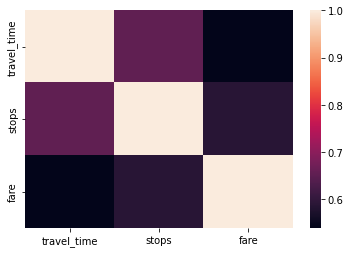

In [33]:
sns.heatmap(df.corr())

In [34]:
df.dtypes

flight_name      object
flight_id        object
travel_time       int64
stops             int64
fare              int64
source           object
destination      object
start_time_hh    object
start_time_mm    object
end_time_hh      object
end_time_mm      object
dtype: object

In [36]:
df

,flight_name,flight_id,travel_time,stops,fare,source,destination,start_time_hh,start_time_mm,end_time_hh,end_time_mm
0,Go First,G8 - 336,135,0,5954,DEL-Delhi,BOM-Mumbai,14,20,16,35
1,Go First,G8 - 392,135,0,5954,DEL-Delhi,BOM-Mumbai,12,45,15,00
2,Go First,G8 - 323,140,0,5954,DEL-Delhi,BOM-Mumbai,18,05,20,25
3,Go First,G8 - 717,280,1,5954,DEL-Delhi,BOM-Mumbai,16,45,21,25
4,Go First,G8 - 167,415,1,5954,DEL-Delhi,BOM-Mumbai,15,00,21,55
...,...,...,...,...,...,...,...,...,...,...,...
7029,IndiGo,6E - 137,680,2,12092,IXJ-Jammu,CJB-Coimbatore,11,55,23,15
7030,IndiGo,6E - 124,405,1,14454,IXJ-Jammu,CJB-Coimbatore,16,30,23,15
7031,IndiGo,6E - 6738,605,1,14454,IXJ-Jammu,CJB-Coimbatore,13,10,23,15
7032,IndiGo,6E - 6152,660,1,10782,CJB-Coimbatore,DED-Dehradun,06,05,17,05


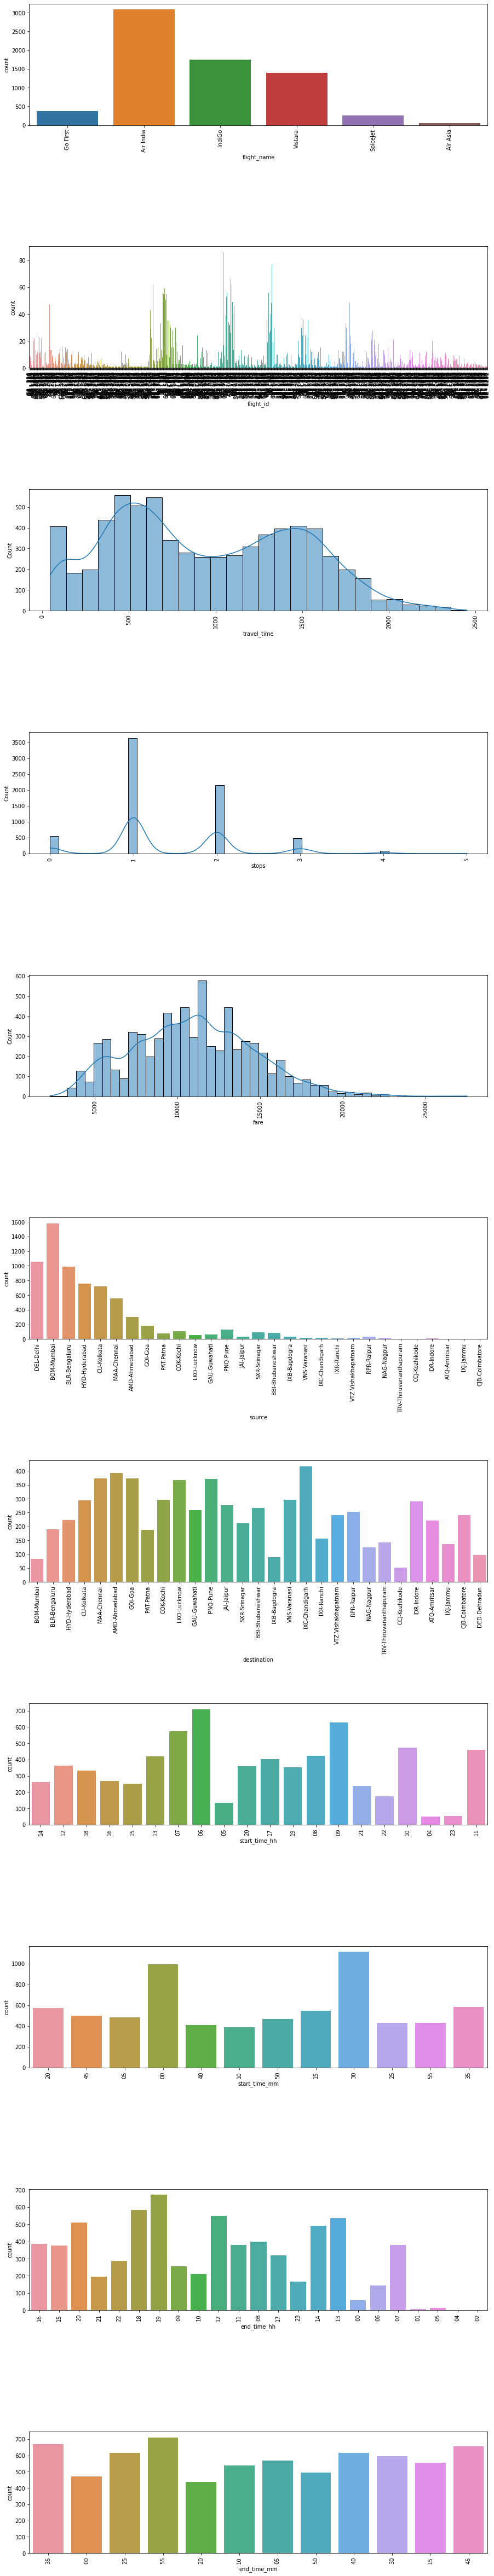

In [35]:
# Univaite analysis 
plt.figure(figsize=(15,200))
for i, column_data in enumerate(df.dtypes.items()):
    plt.subplot(25,1,i+1)
    plt.subplots_adjust(hspace=1)
    column, dtype = column_data
    
    if dtype == 'object':
        plt.xticks(rotation=90)
        sns.countplot(x=column,data=df)
        
    else:
        plt.xticks(rotation=90)
        sns.histplot(df[column], kde=True)

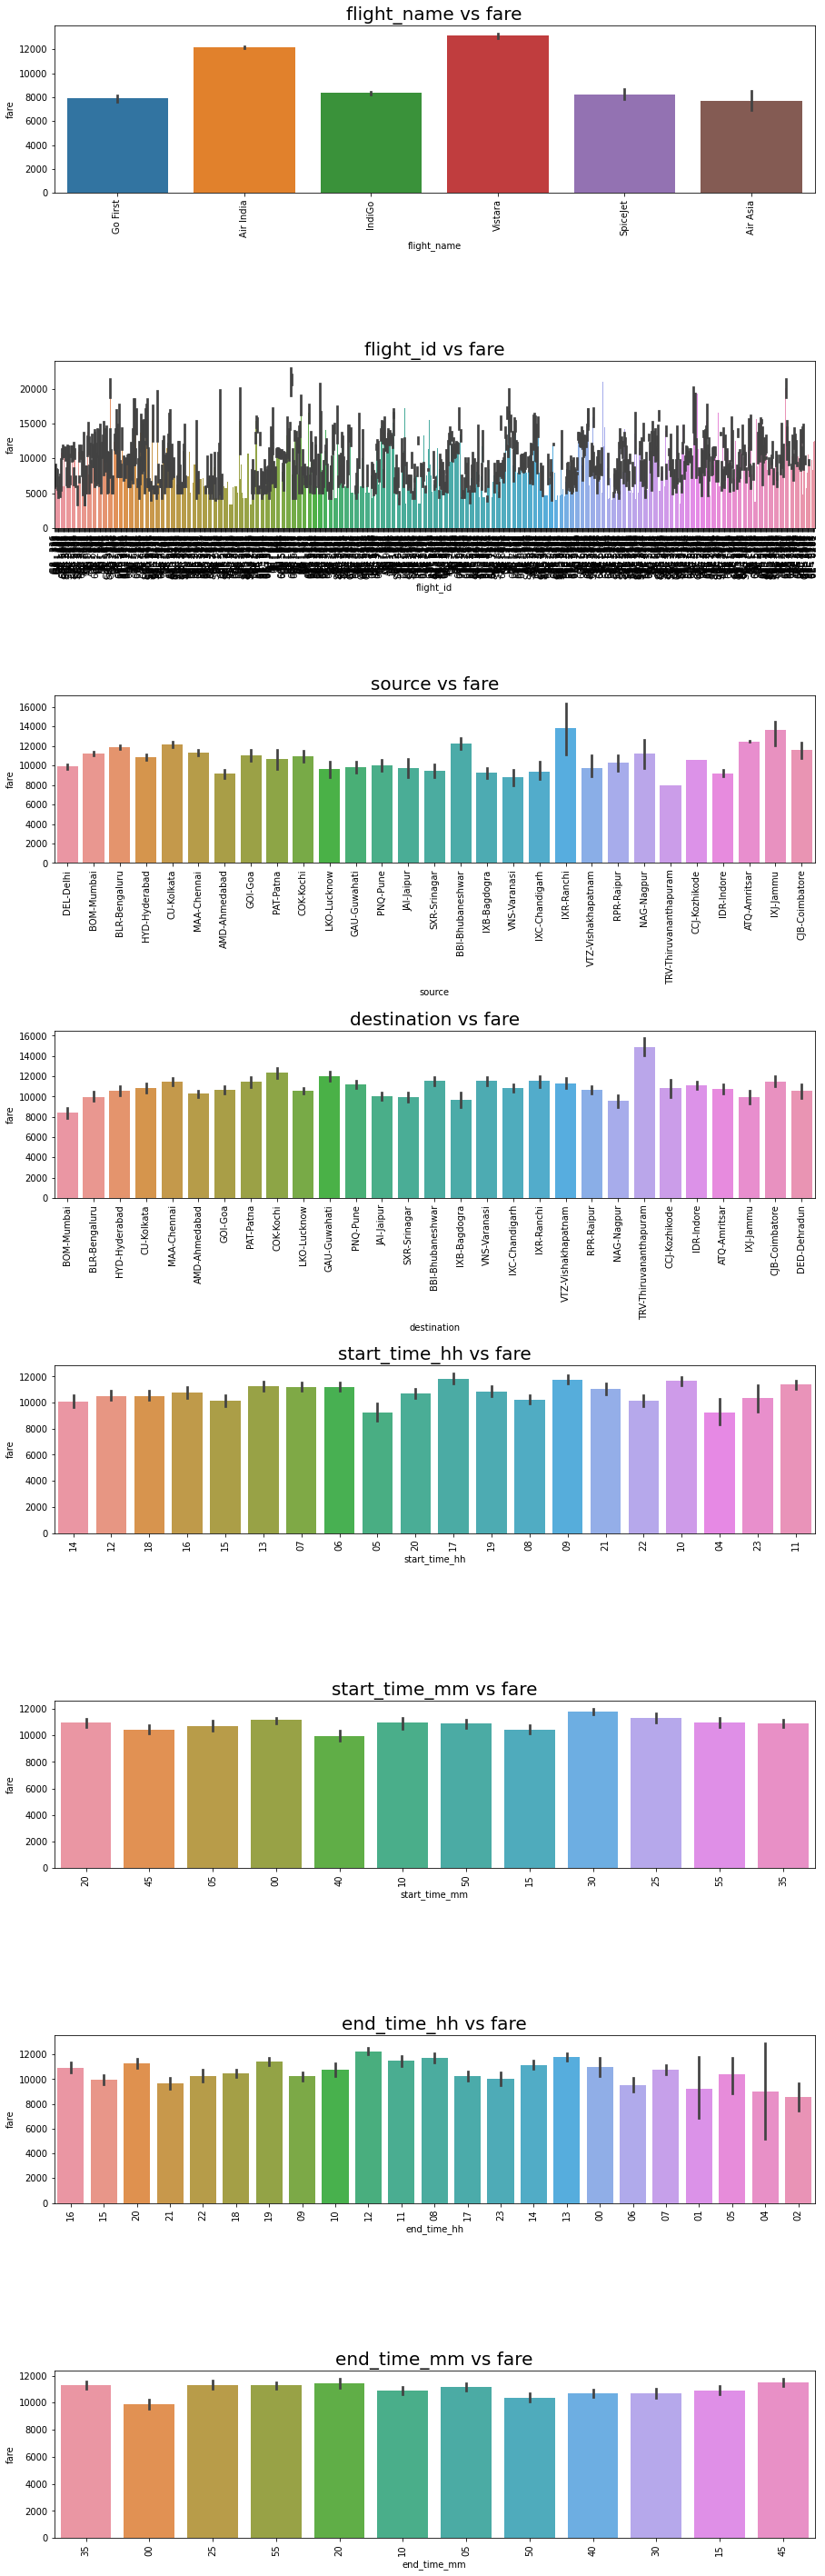

In [37]:
#Bivariate analysis 
plt.figure(figsize=[15,200])
j = 0 
for column, dtype in df.drop('fare',axis=1).dtypes.items():
    if dtype == 'object':
        plt.subplot(30,1,j+1)  
        plt.xticks(rotation=90)
        plt.subplots_adjust(hspace=1)
        plt.title(column + " vs fare", fontsize = 20)
        sns.barplot(x = df[column],y = df['fare'],)
        j += 1

# Label Encoding

In [38]:
obj_columns = df.select_dtypes('object').columns
obj_columns

Index(['flight_name', 'flight_id', 'source', 'destination', 'start_time_hh',
       'start_time_mm', 'end_time_hh', 'end_time_mm'],
      dtype='object')

In [39]:
df[obj_columns] = df[obj_columns].apply(LabelEncoder().fit_transform)

In [40]:
df

,flight_name,flight_id,travel_time,stops,fare,source,destination,start_time_hh,start_time_mm,end_time_hh,end_time_mm
0,2,718,135,0,5954,9,4,10,4,15,7
1,2,734,135,0,5954,9,4,8,9,14,0
2,2,712,140,0,5954,9,4,14,1,19,5
3,2,753,280,1,5954,9,4,12,9,20,5
4,2,677,415,1,5954,9,4,11,0,20,11
...,...,...,...,...,...,...,...,...,...,...,...
7029,3,12,680,2,12092,16,6,7,11,22,3
7030,3,6,405,1,14454,16,6,12,6,22,3
7031,3,372,605,1,14454,16,6,9,2,22,3
7032,3,295,660,1,10782,6,9,2,1,16,1


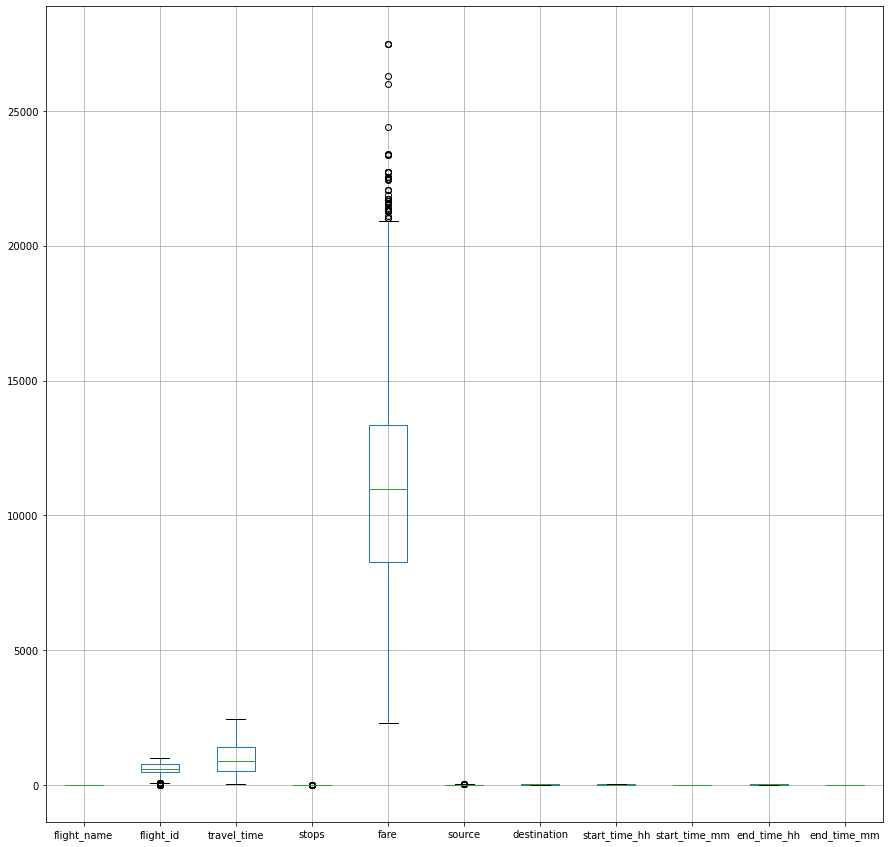

In [41]:
df.boxplot(figsize=(15,15))

In [42]:
X = df.drop('fare', axis=1)
y = df['fare']

In [43]:
X_transformed = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X_transformed, columns=X.columns)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=True, shuffle=True, test_size=.33)

In [45]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    Ridge(),
    SVR(),
]

In [46]:
for model in models:
    print('modal ', model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2_s = r2_score(y_test,y_pred)
    print('R2 score: ', r2_s)
    print('Mean Absoulte Error: ', mean_absolute_error(y_test,y_pred))
    print('Mean Sqaure Error: ', mean_squared_error(y_test,y_pred))
    print('Root Mean Sqaure: ', r2_score(y_test, y_pred))
    score = cross_val_score(model, X, y, cv=10)
    mean_score = score.mean()
    print('Score: ', score)
    print('corss val score mean: ', mean_score)
    print('diffrence between r2 score - cross val score: ', r2_s - mean_score)
    print('-' * 50)

modal  LinearRegression()
R2 score:  0.4286728635258734
Mean Absoulte Error:  2126.325876700879
Mean Sqaure Error:  7564551.99078129
Root Mean Sqaure:  0.4286728635258734
Score:  [0.44754724 0.46283776 0.34418357 0.36958928 0.42440457 0.36135626
 0.44940168 0.40780988 0.33934649 0.20323763]
corss val score mean:  0.38097143691315366
diffrence between r2 score - cross val score:  0.047701426612719755
--------------------------------------------------
modal  RandomForestRegressor()
R2 score:  0.7465447568577865
Mean Absoulte Error:  1244.0051958077177
Mean Sqaure Error:  3355827.584031122
Root Mean Sqaure:  0.7465447568577865
Score:  [0.56145628 0.66505825 0.69931418 0.69200266 0.64559623 0.60591842
 0.68732028 0.70186649 0.33995837 0.27016418]
corss val score mean:  0.5868655337382446
diffrence between r2 score - cross val score:  0.15967922311954197
--------------------------------------------------
modal  DecisionTreeRegressor()
R2 score:  0.5321532241482188
Mean Absoulte Error:  1504

# Hyper parameter tunning

In [47]:
param_grid = {
    'max_depth' : range(10,20),
    'criterion' : ['mse'],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': range(2,6),
}
gridSearchCV = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,refit=True,verbose=3)

In [48]:
gridSearchCV.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2;, score=0.668 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2;, score=0.711 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2;, score=0.677 total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2;, score=0.706 total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2;, score=0.654 total time=   2.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3;, score=0.663 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3;, score=0.710 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3;, score=0.674 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3;, score=0.707 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=3;, score=0.660 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=4;, score=0.662 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=4;, score=0.708 total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=4;, score=0.671 total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=4;, score=0.703 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=4;, score=0.658 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5;, score=0.654 total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5;, score=0.706 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5;, score=0.666 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5;, score=0.700 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5;, score=0.655 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2;, score=0.646 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2;, score=0.684 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2;, score=0.651 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2;, score=0.687 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=2;, score=0.640 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=3;, score=0.635 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=3;, score=0.688 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=3;, score=0.642 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=3;, score=0.673 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=3;, score=0.637 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=4;, score=0.632 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=4;, score=0.676 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=4;, score=0.640 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=4;, score=0.672 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=4;, score=0.627 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5;, score=0.628 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5;, score=0.679 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5;, score=0.630 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5;, score=0.672 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5;, score=0.628 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=2;, score=0.680 total time=   1.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=2;, score=0.727 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=2;, score=0.695 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=2;, score=0.718 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=2;, score=0.674 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=3;, score=0.675 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=3;, score=0.725 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=3;, score=0.684 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=3;, score=0.718 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=3;, score=0.671 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=4;, score=0.674 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=4;, score=0.719 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=4;, score=0.680 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=4;, score=0.715 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=4;, score=0.666 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=5;, score=0.665 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=5;, score=0.716 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=5;, score=0.676 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=5;, score=0.711 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=11, max_features=auto, min_samples_leaf=5;, score=0.669 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=2;, score=0.654 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=2;, score=0.697 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=2;, score=0.662 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=2;, score=0.695 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=2;, score=0.647 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=3;, score=0.644 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=3;, score=0.692 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=3;, score=0.653 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=3;, score=0.688 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=3;, score=0.648 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=4;, score=0.641 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=4;, score=0.688 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=4;, score=0.645 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=4;, score=0.688 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=4;, score=0.643 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=5;, score=0.633 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=5;, score=0.684 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=5;, score=0.642 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=5;, score=0.674 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=11, max_features=sqrt, min_samples_leaf=5;, score=0.636 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=2;, score=0.687 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=2;, score=0.736 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=2;, score=0.693 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=2;, score=0.733 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=2;, score=0.681 total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=3;, score=0.685 total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=3;, score=0.729 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=3;, score=0.694 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=3;, score=0.717 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=3;, score=0.685 total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=4;, score=0.674 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=4;, score=0.726 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=4;, score=0.692 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=4;, score=0.719 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=4;, score=0.678 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=5;, score=0.668 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=5;, score=0.720 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=5;, score=0.678 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=5;, score=0.714 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=12, max_features=auto, min_samples_leaf=5;, score=0.675 total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=2;, score=0.657 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=2;, score=0.709 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=2;, score=0.673 total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=2;, score=0.707 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=2;, score=0.661 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=3;, score=0.654 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=3;, score=0.700 total time=   0.7s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=3;, score=0.659 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=3;, score=0.696 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=3;, score=0.657 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=4;, score=0.648 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=4;, score=0.694 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=4;, score=0.654 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=4;, score=0.691 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=4;, score=0.646 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=5;, score=0.642 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=5;, score=0.693 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=5;, score=0.643 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=5;, score=0.687 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=12, max_features=sqrt, min_samples_leaf=5;, score=0.645 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=2;, score=0.691 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=2;, score=0.744 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=2;, score=0.704 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=2;, score=0.740 total time=   2.0s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=2;, score=0.689 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=3;, score=0.689 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=3;, score=0.738 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=3;, score=0.700 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=3;, score=0.732 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=3;, score=0.686 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=4;, score=0.681 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=4;, score=0.736 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=4;, score=0.694 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=4;, score=0.722 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=4;, score=0.682 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=5;, score=0.676 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=5;, score=0.723 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=5;, score=0.683 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=5;, score=0.720 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=13, max_features=auto, min_samples_leaf=5;, score=0.679 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=2;, score=0.668 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=2;, score=0.717 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=2;, score=0.683 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=2;, score=0.714 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=2;, score=0.665 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=3;, score=0.658 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=3;, score=0.709 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=3;, score=0.668 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=3;, score=0.703 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=3;, score=0.660 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=4;, score=0.655 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=4;, score=0.703 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=4;, score=0.657 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=4;, score=0.692 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=4;, score=0.653 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=5;, score=0.642 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=5;, score=0.698 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=5;, score=0.649 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=5;, score=0.690 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=13, max_features=sqrt, min_samples_leaf=5;, score=0.647 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=2;, score=0.694 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=2;, score=0.747 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=2;, score=0.706 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=2;, score=0.742 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=2;, score=0.696 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=3;, score=0.688 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=3;, score=0.742 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=3;, score=0.699 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=3;, score=0.733 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=3;, score=0.695 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=4;, score=0.679 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=4;, score=0.740 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=4;, score=0.693 total time=   1.7s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=4;, score=0.728 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=4;, score=0.688 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=5;, score=0.675 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=5;, score=0.727 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=5;, score=0.687 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=5;, score=0.720 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=14, max_features=auto, min_samples_leaf=5;, score=0.683 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=2;, score=0.675 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=2;, score=0.725 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=2;, score=0.681 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=2;, score=0.720 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=2;, score=0.673 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=3;, score=0.665 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=3;, score=0.714 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=3;, score=0.664 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=3;, score=0.709 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=3;, score=0.663 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=4;, score=0.657 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=4;, score=0.708 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=4;, score=0.660 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=4;, score=0.702 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=4;, score=0.664 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=5;, score=0.645 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=5;, score=0.695 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=5;, score=0.649 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=5;, score=0.692 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=14, max_features=sqrt, min_samples_leaf=5;, score=0.647 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=2;, score=0.700 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=2;, score=0.753 total time=   2.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=2;, score=0.712 total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=2;, score=0.741 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=2;, score=0.696 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=3;, score=0.694 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=3;, score=0.743 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=3;, score=0.706 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=3;, score=0.737 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=3;, score=0.695 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=4;, score=0.683 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=4;, score=0.735 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=4;, score=0.699 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=4;, score=0.731 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=4;, score=0.691 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5;, score=0.681 total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5;, score=0.731 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5;, score=0.687 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5;, score=0.724 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=15, max_features=auto, min_samples_leaf=5;, score=0.687 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=2;, score=0.675 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=2;, score=0.729 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=2;, score=0.684 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=2;, score=0.721 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=2;, score=0.682 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=3;, score=0.671 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=3;, score=0.715 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=3;, score=0.676 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=3;, score=0.709 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=3;, score=0.673 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=4;, score=0.655 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=4;, score=0.710 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=4;, score=0.664 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=4;, score=0.701 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=4;, score=0.664 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5;, score=0.648 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5;, score=0.702 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5;, score=0.653 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5;, score=0.695 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5;, score=0.655 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=2;, score=0.702 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=2;, score=0.755 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=2;, score=0.711 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=2;, score=0.750 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=2;, score=0.706 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=3;, score=0.692 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=3;, score=0.750 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=3;, score=0.710 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=3;, score=0.739 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=3;, score=0.694 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=4;, score=0.689 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=4;, score=0.740 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=4;, score=0.697 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=4;, score=0.734 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=4;, score=0.690 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=5;, score=0.673 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=5;, score=0.728 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=5;, score=0.685 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=5;, score=0.724 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=16, max_features=auto, min_samples_leaf=5;, score=0.690 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=2;, score=0.681 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=2;, score=0.730 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=2;, score=0.694 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=2;, score=0.721 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=2;, score=0.681 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=3;, score=0.670 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=3;, score=0.719 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=3;, score=0.671 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=3;, score=0.713 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=3;, score=0.672 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=4;, score=0.660 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=4;, score=0.708 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=4;, score=0.667 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=4;, score=0.698 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=4;, score=0.664 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=5;, score=0.649 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=5;, score=0.701 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=5;, score=0.653 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=5;, score=0.691 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=16, max_features=sqrt, min_samples_leaf=5;, score=0.655 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=2;, score=0.702 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=2;, score=0.752 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=2;, score=0.716 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=2;, score=0.746 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=2;, score=0.704 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=3;, score=0.693 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=3;, score=0.745 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=3;, score=0.708 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=3;, score=0.741 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=3;, score=0.701 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=4;, score=0.687 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=4;, score=0.735 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=4;, score=0.695 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=4;, score=0.732 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=4;, score=0.695 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=5;, score=0.679 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=5;, score=0.727 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=5;, score=0.692 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=5;, score=0.726 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=17, max_features=auto, min_samples_leaf=5;, score=0.691 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=2;, score=0.678 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=2;, score=0.730 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=2;, score=0.688 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=2;, score=0.729 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=2;, score=0.679 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=3;, score=0.673 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=3;, score=0.719 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=3;, score=0.684 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=3;, score=0.713 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=3;, score=0.668 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=4;, score=0.663 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=4;, score=0.710 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=4;, score=0.669 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=4;, score=0.706 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=4;, score=0.663 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=5;, score=0.641 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=5;, score=0.704 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=5;, score=0.648 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=5;, score=0.694 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=17, max_features=sqrt, min_samples_leaf=5;, score=0.658 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=2;, score=0.699 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=2;, score=0.755 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=2;, score=0.716 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=2;, score=0.746 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=2;, score=0.703 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=3;, score=0.694 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=3;, score=0.744 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=3;, score=0.703 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=3;, score=0.741 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=3;, score=0.698 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=4;, score=0.682 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=4;, score=0.738 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=4;, score=0.698 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=4;, score=0.732 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=4;, score=0.693 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=5;, score=0.680 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=5;, score=0.730 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=5;, score=0.685 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=5;, score=0.721 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=18, max_features=auto, min_samples_leaf=5;, score=0.689 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=2;, score=0.679 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=2;, score=0.734 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=2;, score=0.688 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=2;, score=0.723 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=2;, score=0.682 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=3;, score=0.666 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=3;, score=0.724 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=3;, score=0.677 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=3;, score=0.716 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=3;, score=0.675 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=4;, score=0.668 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=4;, score=0.705 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=4;, score=0.664 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=4;, score=0.703 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=4;, score=0.667 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=5;, score=0.649 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=5;, score=0.703 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=5;, score=0.658 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=5;, score=0.694 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=18, max_features=sqrt, min_samples_leaf=5;, score=0.656 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=2;, score=0.704 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=2;, score=0.757 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=2;, score=0.717 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=2;, score=0.746 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=2;, score=0.702 total time=   1.4s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=3;, score=0.696 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=3;, score=0.748 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=3;, score=0.711 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=3;, score=0.743 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=3;, score=0.701 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=4;, score=0.683 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=4;, score=0.740 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=4;, score=0.700 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=4;, score=0.732 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=4;, score=0.694 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=5;, score=0.676 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=5;, score=0.732 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=5;, score=0.690 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=5;, score=0.727 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=19, max_features=auto, min_samples_leaf=5;, score=0.689 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=2;, score=0.680 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=2;, score=0.728 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=2;, score=0.682 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=2;, score=0.727 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=2;, score=0.685 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=3;, score=0.666 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=3;, score=0.722 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=3;, score=0.678 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=3;, score=0.715 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=3;, score=0.677 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=4;, score=0.655 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=4;, score=0.709 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=4;, score=0.655 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=4;, score=0.704 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=4;, score=0.666 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 1/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=5;, score=0.644 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 2/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=5;, score=0.702 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 3/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=5;, score=0.647 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 4/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=5;, score=0.698 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV 5/5] END criterion=mse, max_depth=19, max_features=sqrt, min_samples_leaf=5;, score=0.658 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': range(10, 20),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': range(2, 6)},
             verbose=3)

In [49]:
gridSearchCV.best_params_

{'criterion': 'mse',
 'max_depth': 19,
 'max_features': 'auto',
 'min_samples_leaf': 2}

In [50]:
y_pred = gridSearchCV.best_estimator_.predict(X_test)

In [52]:
r2_score(y_test,y_pred)

0.7387426766203768

# saving the model

In [53]:
joblib.dump(gridSearchCV.best_estimator_,'RandomForestRegressor.model')

['RandomForestRegressor.model']